# Logistic Regression on heart attack prediction dataset

---
# **Table of Contents**
---

1. [**Problem Statement**](#Section1)<br>
2. [**Installing & Importing Libraries**](#Section2)<br>
3. [**Data Acquisition & Description**](#Section3)<br>
4. [**Data Pre-Profiling**](#Section4)<br>
5. [**Data Post-Profiling**](#Section5)<br>
6. [**Exploratory Data Analysis**](#Section6)<br>
7. [**Logistic Regression Model**](#Section7)<br>
    - 7.1 [Preparing X and y using pandas](#Section701)<br>
    - 7.2 [Splitting X and y into training and test datasets](#Section702)<br>
 
    
    
    

---
<a name = Section1></a>
# **1. Problem Statement**
---
Heart disease is the major cause of morbidity and mortality globally: it accounts for more deaths annually than any other cause. According to the WHO, an estimated 17.9 million people died from heart disease in 2016, representing 31% of all global deaths. Over three quarters of these deaths took place in low- and middle-income countries.

Of all heart diseases, coronary heart disease (aka heart attack) is by far the most common and the most fatal. In the United States, for example, it is estimated that someone has a heart attack every 40 seconds and about 805,000 Americans have a heart attack every year (CDC 2019).

The purpose of this project is to predict the occurrence of heart attack as per the available independent variables using Logistic Regression

[![](https://img.lovepik.com/photo/50074/6189.jpg_wh860.jpg)](https://img.lovepik.com/photo/50074/6189.jpg_wh860.jpg)

---
<a id = Section2></a>
# **2. Installing & Importing Libraries**
---

- This section is emphasised on installing and importing the necessary libraries that will be required.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn import metrics
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np
#-------------------------------------------------------------------------------------------------------------------------------
# allow plots to appear directly in the notebook
%matplotlib inline

plt.rcParams['figure.figsize'] = 12, 7
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

from sklearn.feature_selection import RFE
import statsmodels.api as sm

---
<a name = Section3></a>
# **3. Data Acquisition & Description**
---

|Id|Feature|Description|
|:--|:--|:--|
|01| age             |  Age of the Person |
|02| sex             |  Gender of the Person |
|03| cp              |  Chest Pain type |
|04| trestbps     |  Resting blood pressure |
|05| chol             |  Serum Cholestoral in mg/dl |
|06| fbs              |  Fasting blood sugar > 120 mg/dl |
|07| restecg             |  Resting electrocardiographic results |
|08| thalach             |  Maximum heart rate achieved |
|09| exang             |  Exercise induced angina |
|10| oldpeak             |  ST depression induced by exercise relative to rest |
|11| slope             |  The slope of the peak exercise ST segment |
|12| ca             |  number of major vessels (0-3) colored by flourosopy |
|13| thal             |  thal: 0 = normal; 1 = fixed defect; 2 = reversable defect |
|14| target             |  target: 0= less chance of heart attack 1= more chance of heart attack|

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Harsha92/Machine-Learning-Using-Python/main/Logistic%20Regression/Heart%20Attack%20Prediction/heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


---
<a name = Section4></a>
# **4. Data Pre-Profiling**
---

- This section is emphasised on getting a report about the data.

- You need to perform pandas profiling and get some observations out of it...

In [6]:
profile = data.profile_report(title="Heart attack Data Profiling before Data Preprocessing", progress_bar=False, minimal=True)
profile.to_file(output_file="heart_attack_data_before_preprocessing.html")

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 14
- Number of observations: 303
- Missing cells: 0

<br>

- **sex 0 means female and 1 means male**

In [7]:
data_copy = data.copy()  # Make copy of existing dataset

In [8]:
print(data is data_copy)

False


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


---
<a name = Section5></a>
# **5. Data Post-Profiling**
---

- This section is emphasised on getting a report about the data after the data manipulation.

- You may end up observing some new changes, so keep it under check and make right observations.

In [10]:
profile = data.profile_report(title="Heart attack Data Profiling after Data Preprocessing", progress_bar=False, minimal=True)
profile.to_file(output_file="heart_attack_data_after_preprocessing.html")

---
<a name = Section6></a>
# **6. Exploratory Data Analysis**
---

- This section is emphasised on asking the right questions and perform analysis using the data.

- Note that there is no limit how deep you can go, but make sure not to get distracted from right track.

In [11]:
plt.rcParams['figure.figsize'] = 12, 7
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

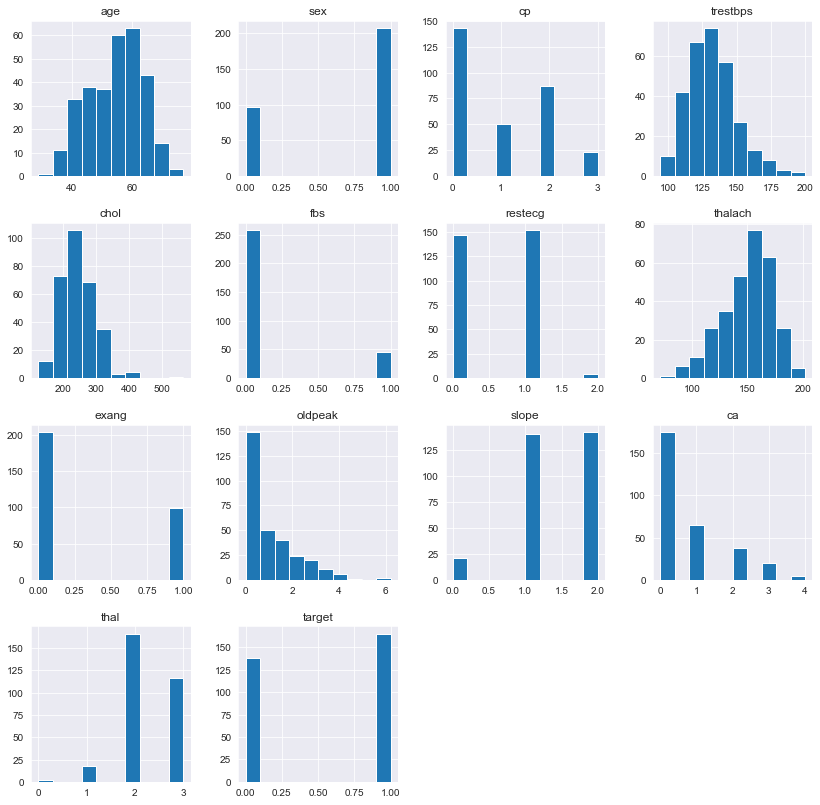

In [259]:
data.hist(figsize=(14,14));

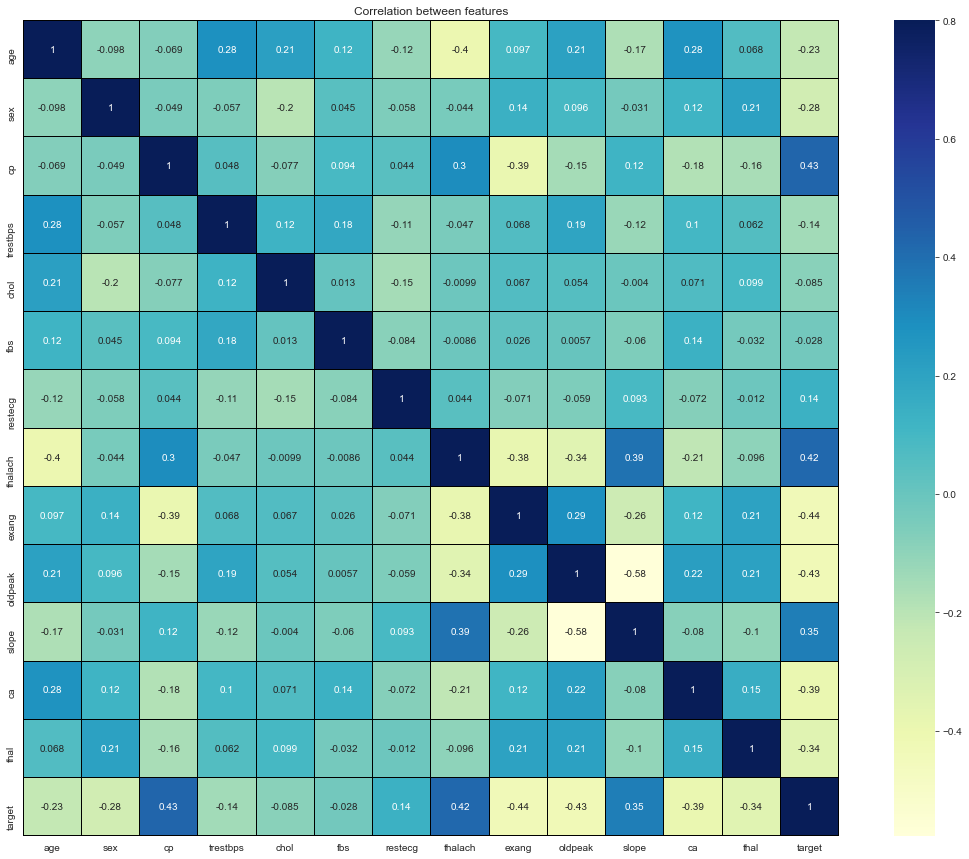

In [12]:
plt.rcParams['figure.figsize'] = 20, 15
corr = data.corr()
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features');

In [13]:
data.groupby(['cp'])['target'].count()

cp
0    143
1     50
2     87
3     23
Name: target, dtype: int64

In [14]:
data.groupby(['slope'])['target'].count()

slope
0     21
1    140
2    142
Name: target, dtype: int64

In [15]:
data.groupby(['age'])['target'].count().sort_values(ascending=False).head(10)

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
Name: target, dtype: int64

In [16]:
data.groupby(['sex'])['target'].count()

sex
0     96
1    207
Name: target, dtype: int64

In [17]:
data.groupby(['ca'])['target'].count()

ca
0    175
1     65
2     38
3     20
4      5
Name: target, dtype: int64

We can get the below insights from correlation report

- **Chest pain, Maximum Heart rate and Slope are positively corelated with target and has significantly higher correlation**
- **Age, Sex, exang, oldpeak, ca and thal are negatively corelated with target and has significantly higher correlation**
- **trestbps, chol, fbs, restecg are weekly corelated with target and we can consider dropping these variables**

---
<a name = Section7></a>
# **7. Logistic Regression Model**
---


<a id = Section701></a>
### 7.1 Preparing X and y using pandas

In [236]:
X = data.loc[:, data.columns != 'target']
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [237]:
y = data.target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

<a id=Section702></a>
### 7.2 Splitting X and y into training and test datasets.

In [238]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=np.argmax(scores))

In [239]:
print(X_train.shape)
print(y_train.shape)

(212, 13)
(212,)


In [240]:
print(X_test.shape)
print(y_test.shape)

(91, 13)
(91,)


 - Before applying algorithm we should check whether the data is equally splitted or not, because if data is not splitted equally it will cause for data imbalacing problem

In [241]:
from collections import Counter
print(y_test.unique())
print(Counter(y_train))

[1 0]
Counter({0: 109, 1: 103})


In [242]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [243]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [244]:
y_pred_train = logreg.predict(X_train)  

In [245]:
y_pred_test = logreg.predict(X_test)                 # make predictions on the testing set

In [246]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.8351648351648352


In [247]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

print(confusion_matrix)

    0   1
0  22   7
1   8  54


In [248]:
confusion_matrix.index = ['Actual Low Risk ','Actual High Risk ']
confusion_matrix.columns = ['Predicted Low Risk ','Predicted High Risk']
print(confusion_matrix)

                   Predicted Low Risk   Predicted High Risk
Actual Low Risk                     22                    7
Actual High Risk                     8                   54


In [257]:
print('Classification Report for test data is \n:', classification_report(y_test,y_pred_test))

Classification Report for test data is 
:               precision    recall  f1-score   support

           0       0.57      0.39      0.46        44
           1       0.56      0.72      0.63        47

    accuracy                           0.56        91
   macro avg       0.56      0.55      0.54        91
weighted avg       0.56      0.56      0.55        91



In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Model 2: Deleting trestbps, chol, fbs, restecg

In [223]:
X2 = data[ ['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'] ]
X2.head()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,150,0,2.3,0,0,1
1,37,1,2,187,0,3.5,0,0,2
2,41,0,1,172,0,1.4,2,0,2
3,56,1,1,178,0,0.8,2,0,2
4,57,0,0,163,1,0.6,2,0,2


In [225]:
y2 = data.target
y2.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [227]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state = np.argmax(scores) )

In [228]:
print(X2_train.shape)
print(y2_train.shape)

(212, 9)
(212,)


In [229]:
print(X2_test.shape)
print(y2_test.shape)

(91, 9)
(91,)


 - Before applying algorithm we should check whether the data is equally splitted or not, because if data is not splitted equally it will cause for data imbalacing problem

In [230]:
from collections import Counter
print(y2_test.unique())
print(Counter(y2_train))

[1 0]
Counter({0: 109, 1: 103})


In [231]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

In [232]:
logreg2 = LogisticRegression()
logreg2.fit(X2_train,y2_train)

LogisticRegression()

In [233]:
y2_pred_train = logreg2.predict(X2_train)  

In [234]:
y2_pred_test = logreg2.predict(X2_test)  

In [235]:
print('Accuracy score for test data is:', accuracy_score(y2_test, y2_pred_test))

Accuracy score for test data is: 0.8461538461538461


In [251]:
# scores = []
# for i in range(1000):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = i)
#     lr = LogisticRegression()
#     lr.fit(X2_train,y2_train)
#     y_pred = lr.predict(X_test)
#     scores.append(r2_score(y_test, y_pred))

In [222]:
np.argmax(scores)

306

In [252]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix_2 = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

In [253]:
confusion_matrix_2.index = ['Actual Low Risk ','Actual High Risk ']
confusion_matrix_2.columns = ['Predicted Low Risk ','Predicted High Risk']
print(confusion_matrix_2)

                   Predicted Low Risk   Predicted High Risk
Actual Low Risk                     17                   27
Actual High Risk                    13                   34


In [256]:
print('Classification Report for test data is: \n' , classification_report(y2_test,y2_pred_test))

Classification Report for test data is: 
               precision    recall  f1-score   support

           0       0.76      0.76      0.76        29
           1       0.89      0.89      0.89        62

    accuracy                           0.85        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.85      0.85      0.85        91

